<a href="https://colab.research.google.com/github/frankodzia/ai-course-gp/blob/main/Lekcja_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

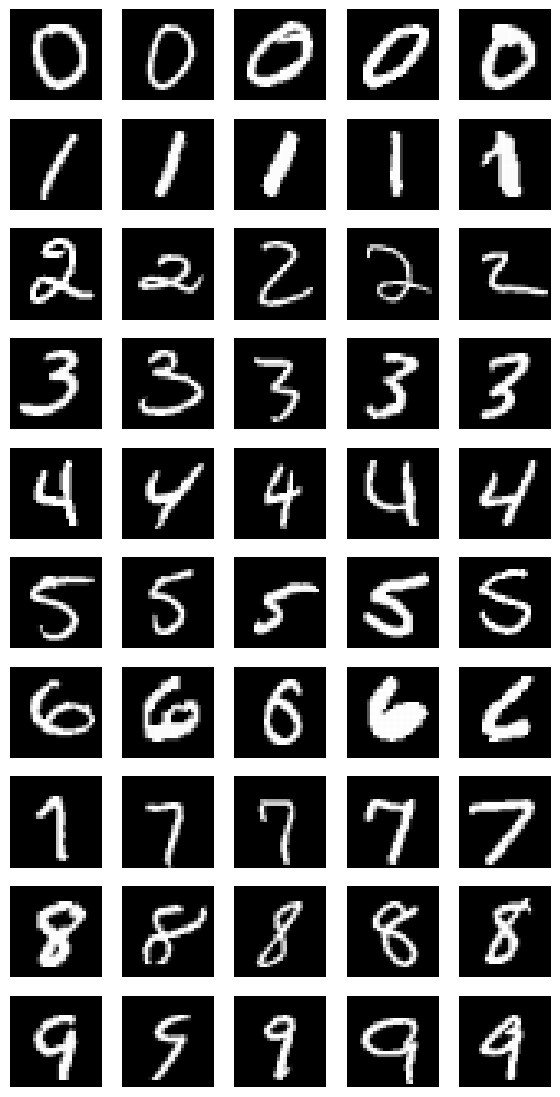

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(7,14))
rng = np.random.default_rng()

for digit in range(10):
  idx = np.where(y_train == digit)[0]
  chosen = rng.choice(idx, size=5, replace=False)

  for col, img_idx in enumerate(chosen):
    ax = axes[digit, col]
    ax.imshow(x_train[img_idx], cmap="gray")
    ax.axis("off")

plt.show()

In [7]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Po normalizacji: min/max x_train:", x_train.min(), x_train.max(), "dtype:", x_train.dtype)

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

print("Po dodaniu kanału:", x_train.shape, x_test.shape)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Po normalizacji: min/max x_train: 0.0 1.0 dtype: float32
Po dodaniu kanału: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(512, activation="relu"),
    layers.Dense(216, activation="relu"),
    layers.Dense(10, activation="softmax"),

])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8996 - loss: 0.3317 - val_accuracy: 0.9713 - val_loss: 0.0931
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9746 - loss: 0.0803 - val_accuracy: 0.9775 - val_loss: 0.0718
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9747 - val_loss: 0.0854
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9876 - loss: 0.0381 - val_accuracy: 0.9793 - val_loss: 0.0701
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0314 - val_accuracy: 0.9818 - val_loss: 0.0714
Epoch 6/10
1228/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9921 - loss: 0.0238

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Strata: {loss:.4f}, Dokładność: {accuracy:.4f}")

In [9]:
images_to_check = x_test[:10]
labels_to_check = y_test[:10]

x_test = x_test[10:]
y_test = y_test[10:]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import time

start = time.time()

model = Sequential([
    # 1. warstwa konwolucyjna
    Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding = 'same', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

     # 2. warstwa konwolucyjna
    Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

     # 3. warstwa konwolucyjna
    Conv2D(filters = 256, kernel_size=(3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.40),

    Dense(10, activation='softmax')
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))


loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Strata: {loss:.4f}, Dokładność: {accuracy:.4f}")

end = time.time()

print(f"Czas wykonania: {end - start:.2f} sekund")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8980 - loss: 0.3284 - val_accuracy: 0.9867 - val_loss: 0.0430
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9796 - loss: 0.0690 - val_accuracy: 0.9899 - val_loss: 0.0275
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9831 - loss: 0.0535 - val_accuracy: 0.9928 - val_loss: 0.0215
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9866 - loss: 0.0430 - val_accuracy: 0.9920 - val_loss: 0.0232
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9880 - loss: 0.0384 - val_accuracy: 0.9912 - val_loss: 0.0249
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9897 - loss: 0.0339 - val_accuracy: 0.9873 - val_loss: 0.0885
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 0.9939 - val_loss: 0.0175
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9907 - loss: 0

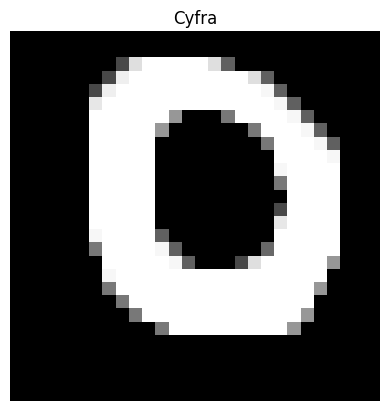

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
Rozpoznana cyfra: 0


In [16]:
from pathlib import Path
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

for path in Path('images').rglob("*.png"):
  image = Image.open(path).convert('L')
  #zależy od obrazka. Konwersja na białe cyfry przy czarnym tle
  image = ImageOps.invert(image)

  image = image.resize((28,28))
  image = np.array(image).reshape(1,28,28,1)/255.0

  plt.imshow(image.reshape(28,28), cmap='gray')
  plt.title("Cyfra")
  plt.axis('off')
  plt.show()

  prediction = model.predict(image)[0]
  predicted_digit = np.argmax(prediction)

  print(f"Rozpoznana cyfra: {predicted_digit}")